# Using the kNN algorithm to Predict the Price of a Diamond

In this Jupyter workbook, the k-Nearest Neighbor algorithm is applied many times to a dataset of over 54,000 diamonds. Each dimension represents a certain characteristic about a diamond, and the algorithm is attempting to predict the diamonds value (in USD).

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

## Data manipulation

First training data is loaded from a CSV file. Each row is a diamond in the dataset is a feature.

Description of the features:
   
   carat: number of carats in the diamond
   
   cut: quality of the diamond, values include (Fair, Good, Very Good, Premium, Ideal)
   
   color: represented by a letter in the alphabetic range of B (best) to J (worst)
   
   clarity: a measurement of how transparent the diamond is. Possible values, from best to worst, are (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1)
   
   x: length of diamond in mm,
   
   y: width of diamond in mm,
   
   z: depth of diamond in mm
   
   total depth percentage, equal to z / ((x + y) / 2) * 100
   
   table percentage: width of top of the diamond relative to widest region
   
   price: price of diamond in USD

The first 5 rows are printed to show a sample of the data.

In [2]:
data = pd.read_csv("diamonds.csv")

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The first step is to transform the categorical features into dummy variables, so that the kNN algorithm can be applied properly. Pandas has a useful function called "get_dummies" that will be used on the features "cut", "color", and "clarity"

In [3]:
data = pd.get_dummies(data)

print("The dimensions of the data after this transformation are : " + str(data.shape))
data.head()

The dimensions of the data after this transformation are : (53940, 27)


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Next, the testing and training sets must be created. Observations in the testing set will be queried against the training set data.

Approximatley 75% of the 53940 observations will be used for the training set, while 25% will be used for the testing set.

In [4]:
train, test = train_test_split(data, test_size=.25, random_state = 3)

print("The number of observations in the training data set is " + str(len(train)))
print("The number of observations in the test data set is " + str(len(test)))

The number of observations in the training data set is 40455
The number of observations in the test data set is 13485


The training and test data further need to be split into the predictors, and what the kNN algorithm will attempt to predict, which is the price of the diamond.

The training and testing predictor datasets will have the leter 'x' appended to the names of the DataFrame that store this data, while the datasets that contain the price of each diamond will have the letter 'y' appended.

In [5]:
train_x = train.drop('price', 1)
train_y = pd.DataFrame(train['price'].values.reshape(len(train), 1), columns = ["price"])
test_x = test.drop('price', 1)
test_y = pd.DataFrame(test['price'].values.reshape(len(test), 1), columns = ["price"])

print("The dimensions of the train_x = " + str(train_x.shape))
print("The dimensions of the train_y = " + str(train_y.shape))
print("The dimensions of the test_x = " + str(test_x.shape))
print("The dimensions of the test_y = " + str(test_y.shape))

The dimensions of the train_x = (40455, 26)
The dimensions of the train_y = (40455, 1)
The dimensions of the test_x = (13485, 26)
The dimensions of the test_y = (13485, 1)


The final bit of data manipulation that must be done is to normalize train_x and test_x. Otherwise, features with larger standard deviations will be weighted more heavily in the distance caluclations that are computed as part of the kNN algorithm. It is important to avoid introducing this bias.

In [6]:
train_x = pd.DataFrame(preprocessing.scale(train_x), columns = list(train_x))
test_x = pd.DataFrame(preprocessing.scale(test_x), columns = list(test_x))

Below is a sample of what train_x and train_y look like

In [7]:
print("The first 5 rows of train_x:")

train_x.head()

The first 5 rows of train_x:


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.448151,0.804283,1.127536,0.623652,0.521595,0.665375,-0.175815,-0.316288,-0.813011,1.699092,...,-0.334225,-0.236099,-0.117616,-0.184302,-0.566474,-0.45319,2.376159,-0.542848,-0.270906,-0.321603
1,0.595747,-0.520556,1.127536,0.792901,0.731237,0.679472,-0.175815,-0.316288,-0.813011,1.699092,...,-0.334225,4.235517,-0.117616,-0.184302,1.765305,-0.45319,-0.420847,-0.542848,-0.270906,-0.321603
2,-0.943473,1.501566,-1.096570,-1.104475,-1.050723,-0.927557,-0.175815,-0.316288,-0.813011,-0.588550,...,-0.334225,-0.236099,-0.117616,-0.184302,-0.566474,-0.45319,2.376159,-0.542848,-0.270906,-0.321603
3,-1.048899,0.316185,-1.541392,-1.282632,-1.207955,-1.209492,-0.175815,-0.316288,1.229996,-0.588550,...,2.991994,-0.236099,-0.117616,-0.184302,-0.566474,-0.45319,-0.420847,-0.542848,3.691316,-0.321603
4,-1.027813,-1.775666,2.017178,-1.175738,-1.216690,-1.336363,-0.175815,-0.316288,-0.813011,1.699092,...,-0.334225,-0.236099,-0.117616,-0.184302,-0.566474,-0.45319,-0.420847,-0.542848,3.691316,-0.321603


In [8]:
print("The first 5 rows of train_y:")

train_y.head()

The first 5 rows of train_y:


,price
0,7466
1,4173
2,792
3,532
4,997


## Algorithm

kNN can now be applied to the data.

The two key parameters that algorithm requires are the distance formula, and the number of nearest neighbors that will be used to calculate the predicted price of a diamond (k).

The metric that we will be looking to minimize is that mean squared error. The following function is defined to create the kNN model with the specified parameters, apply the algorithm to the test data using the training data as a test set, and then compute the average MSE using the predicted price and the actual price.

In [10]:
def test_and_compute_mse(k, distance_algorithm, train_x, train_y, test_x, test_y):
    model = KNeighborsRegressor(n_neighbors = k, metric = distance_algorithm)
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    average_mse = float(np.mean((test_y - predictions)**2))
    return average_mse

This function is tested using k=10 and the Euclidean distance formula below

In [11]:
mse_10_euclidean = test_and_compute_mse(10, 'euclidean', train_x, train_y, test_x, test_y)

In [12]:
print("The average MSE  (using k = 10 and the Euclidean distance formula) is " + str(mse_10_euclidean))

The average MSE  (using k = 10 and the Euclidean distance formula) is 878746.5271687061


The mean MSE with parameters of k = 10 and the distance formula being the Euclidean is roughly 878746. That seems like quite a large but error, but to provide some more insight on how well the algorithm performs with these parameters, this number should be compared with the variance of the test data diamond values.

In [13]:
var_test_y = float(np.var(test_y))
print("The variance of the test data is " + str(var_test_y))
print("The average MSE (using k = 10 and the Euclidean distance formula) divided by the variance of the test data diamond " + 
      "values " + str(mse_10_euclidean / var_test_y)) 

The variance of the test data is 15719950.020250188
The average MSE (using k = 10 and the Euclidean distance formula) divided by the variance of the test data diamond values 0.055900084035681974


The average MSE is roughly 5% of the variance in the data. This is a good sanity check to see that the model is making decent predictions for this data set.

It would be interesting to see how the average MSE changes as k changes. To accomplish this, the average MSE is calculated for every possible k in the range of (1, 20). The distance formula remains the Euclidean.

These values will be stored in a dictionary (with (key, value) = (k, average mse)) so that they can be referred back to.

In [14]:
average_mses_euclidean_dict = {}

for i in range(1,21):
    average_mses_euclidean_dict[i] = test_and_compute_mse(i, 'euclidean', train_x, train_y, test_x, test_y)

A bar graph can be created to visualize how the average MSE changes with the value of k.

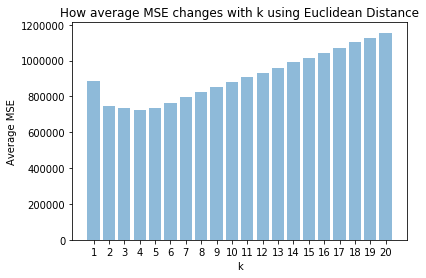

In [15]:
k_values = []
average_mses = []

for key in average_mses_euclidean_dict:
    k_values.append(key)
    average_mses.append(average_mses_euclidean_dict[key])

fig1, ax1 = plt.subplots()

ax1.bar(k_values, average_mses, align='center', alpha=0.5)
ax1.set_title("How average MSE changes with k using Euclidean Distance")
ax1.set_xticks(k_values)
ax1.set_xlabel('k')
ax1.set_ylabel('Average MSE')
plt.show()

In [16]:
min_mse_euclidean = min(average_mses)
min_mse_euclidean_k_value = min(average_mses_euclidean_dict, key=average_mses_euclidean_dict.get)

print("The minimum average MSE is equal to " + str(min_mse_euclidean) + ", achieved when k =  " + 
      str(min_mse_euclidean_k_value))

The minimum average MSE is equal to 726599.5862625139, achieved when k =  4


There are two more distance functions that this workbook will test besides the Euclidean, which are the Manhattan (defined as sum(|x - y|)), and the Chebyshev (defined as max(|x - y|)). The Euclidean dataset is not known to be very strong when mixing categorical and numerical data, so perhaps one of these other two will fair better.

Again, the values are computed for each possible value of k in the range of [1, 20], and the results are visualized using a bar graph.

In [17]:
average_mses_manhattan_dict = {}
average_mses_chebyshev_dict = {}

for i in range(1,21):
    average_mses_manhattan_dict[i] = test_and_compute_mse(i, 'manhattan', train_x, train_y, test_x, test_y)
    average_mses_chebyshev_dict[i] = test_and_compute_mse(i, 'chebyshev', train_x, train_y, test_x, test_y)

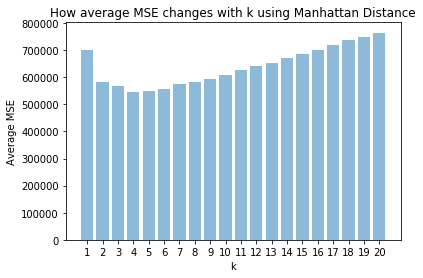

In [18]:
k_values = []
average_mses = []

for key in average_mses_manhattan_dict:
    k_values.append(key)
    average_mses.append(average_mses_manhattan_dict[key])

fig2, ax2 = plt.subplots()    


ax2.bar(k_values, average_mses, align='center', alpha=0.5)
ax2.set_title("How average MSE changes with k using Manhattan Distance")
ax2.set_xticks(k_values)
ax2.set_xlabel('k')
ax2.set_ylabel('Average MSE')
plt.show()

In [19]:
min_mse_manhattan = min(average_mses)
min_mse_manhattan_k_value = min(average_mses_manhattan_dict, key=average_mses_manhattan_dict.get)

print("The minimum average MSE is equal to " + str(min_mse_manhattan) + ", achieved when k =  " + 
      str(min_mse_manhattan_k_value))

The minimum average MSE is equal to 545466.588445495, achieved when k =  4


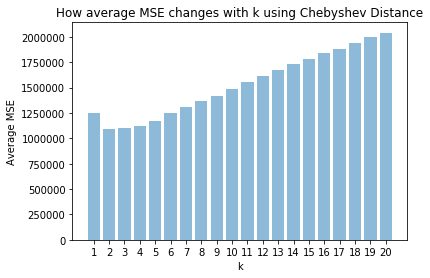

In [21]:
k_values = []
average_mses = []

for key in average_mses_chebyshev_dict:
    k_values.append(key)
    average_mses.append(average_mses_chebyshev_dict[key])

fig3, ax3 = plt.subplots()    

ax3.bar(k_values, average_mses, align='center', alpha=0.5)
ax3.set_title("How average MSE changes with k using Chebyshev Distance")
ax3.set_xticks(k_values)
ax3.set_xlabel('k')
ax3.set_ylabel('Average MSE')
plt.show()

In [22]:
min_mse_chebyshev = min(average_mses)
min_mse_chebyshev_k_value = min(average_mses_chebyshev_dict, key=average_mses_chebyshev_dict.get)

print("The minimum average MSE is equal to " + str(min_mse_chebyshev) + ", achieved when k = " + 
      str(min_mse_chebyshev_k_value))

The minimum average MSE is equal to 1090156.709176863, achieved when k = 2


Interestingly, using the Manhattan distance formula led to smallest Average MSE of roughly 545,000, while the Chebyshev resulted in the far greatest of over 1,000,000. All 3 graphs have the same 'swoosh' shape, with a sharp decrease in Average MSE when k increases from k=1 to k=2, a more steady decrease to when k=3 or k=4, before it gradually increases up to k = 20. The Chebyshev has the smallest decrease between values of k=1 and k=2.

To examine why Chebyshev performs a lot worse than the other two distance formulas, it is neccessary to examine what the largest difference between each feature of a sample of observations from the dataset (since that is how Chebyshev distance is calculated). Even though the data has been normalized, categorical features are by far the most likely to have the greatest absolute difference between any two random points. This is shown below.

In [23]:
tally = {}

for i in range(0, 100):
    for j in range(i + 1, 100):
        max_distance = 0
        max_column = None
        for column in train_x:
            distance = abs(train_x[column][i] - train_x[column][j])
            if distance > max_distance:
                distance = max_distance
                max_column = column
        if max_column in tally:
            tally[max_column] += 1
        else:
            tally[max_column] = 1

print(tally)

{'clarity_SI1': 260, 'cut_Very Good': 49, 'cut_Ideal': 9, 'color_I': 113, 'z': 24, 'color_G': 157, 'y': 1, 'clarity_VVS1': 516, 'color_J': 86, 'clarity_VS2': 1320, 'clarity_VVS2': 736, 'color_E': 38, 'clarity_SI2': 504, 'color_F': 73, 'color_H': 208, 'clarity_IF': 25, 'cut_Premium': 31, 'clarity_VS1': 800}


In this function, a sample of 100 observations from the training data set is taken. For each pair of points in the dataset, the feature with maximum absolute difference between the two points is determined, and a tally is kept using a dictionary. 

Out of the roughly 10,000 distances computed between all of the observations, by far and away the features with the maximum absolute difference were categorical. This makes sense, since there are a lot more categorical variables then numerical ones. However, that means that the continuous features are being vastly overlooked when kNN is applied using the Chebyshev distance formula.

## Weighted Variation

Every use of the kNN that has occured so far has been unweighted. That means that when a price prediction for an observation in the test data set, each of that diamond's k nearest neighbors is weighted equally when computing their average price. Sci-Kit Learn also has a weighted version of the algorithm, where each of the k nearest neighbors' price is multiplied by the following:

1 / d(Xi, Xq)^2

where d(Xi, Xq) is the distance between the query diamond and one of its nearest neighbors. This results in the closest neighbors being weighted higher when computing the predicted price.

To see how using this weighted version of kNN compares, the first step is to create a new function that uses the weighted version of the algorithm.

In [24]:
def test_and_compute_mse_weighted(k, distance_algorithm, train_x, train_y, test_x, test_y):
    model = KNeighborsRegressor(n_neighbors = k, metric = distance_algorithm, weights = 'distance')
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    average_mse = float(np.mean((test_y - predictions)**2))
    return average_mse

In [25]:
average_mses_euclidean_weighted_dict = {}
average_mses_manhattan_weighted_dict = {}
average_mses_chebyshev_weighted_dict = {}

for i in range(1,21):
    average_mses_euclidean_weighted_dict[i] = test_and_compute_mse_weighted(i, 'euclidean', train_x, train_y, test_x, test_y)
    average_mses_manhattan_weighted_dict[i] = test_and_compute_mse_weighted(i, 'manhattan', train_x, train_y, test_x, test_y)
    average_mses_chebyshev_weighted_dict[i] = test_and_compute_mse_weighted(i, 'chebyshev', train_x, train_y, test_x, test_y)

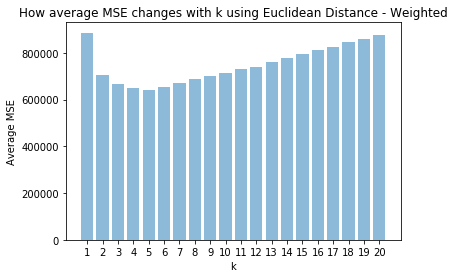

In [26]:
k_values = []
average_mses = []

for key in average_mses_euclidean_weighted_dict:
    k_values.append(key)
    average_mses.append(average_mses_euclidean_weighted_dict[key])

fig4, ax4 = plt.subplots()    

ax4.bar(k_values, average_mses, align='center', alpha=0.5)
ax4.set_title("How average MSE changes with k using Euclidean Distance - Weighted")
ax4.set_xticks(k_values)
ax4.set_xlabel('k')
ax4.set_ylabel('Average MSE')
plt.show()

In [27]:
min_mse_euclidean_weighted = min(average_mses)
min_mse_euclidean_weighted_k_value = min(average_mses_euclidean_dict, key=average_mses_euclidean_dict.get)

print("The minimum average MSE using the Euclidean distance is equal to " + str(min_mse_euclidean_weighted) 
      + ", achieved when k = " + str(min_mse_euclidean_weighted_k_value))

The minimum average MSE using the Euclidean distance is equal to 641275.3818165851, achieved when k = 4


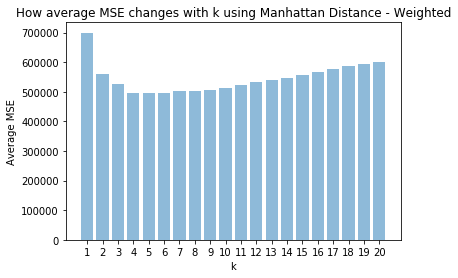

In [28]:
k_values = []
average_mses = []

for key in average_mses_manhattan_weighted_dict:
    k_values.append(key)
    average_mses.append(average_mses_manhattan_weighted_dict[key])

fig5, ax5 = plt.subplots()    

ax5.bar(k_values, average_mses, align='center', alpha=0.5)
ax5.set_title("How average MSE changes with k using Manhattan Distance - Weighted")
ax5.set_xticks(k_values)
ax5.set_xlabel('k')
ax5.set_ylabel('Average MSE')
plt.show()

In [29]:
min_mse_manhattan_weighted = min(average_mses)
min_mse_manhattan_weighted_k_value = min(average_mses_manhattan_weighted_dict, key=average_mses_manhattan_weighted_dict.get)

print("The minimum average MSE when using the Manhattan distance is equal to " + str(min_mse_manhattan_weighted) 
      + ", achieved when k = " + str(min_mse_manhattan_weighted_k_value))

The minimum average MSE when using the Manhattan distance is equal to 494489.1265966323, achieved when k = 6


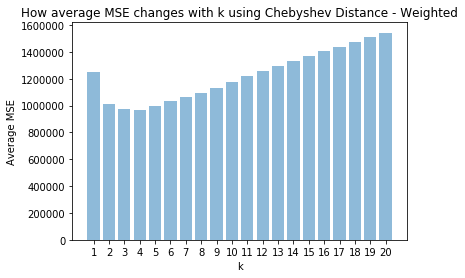

In [30]:
k_values = []
average_mses = []

for key in average_mses_chebyshev_weighted_dict:
    k_values.append(key)
    average_mses.append(average_mses_chebyshev_weighted_dict[key])

fig6, ax6 = plt.subplots()    

ax6.bar(k_values, average_mses, align='center', alpha=0.5)
ax6.set_title("How average MSE changes with k using Chebyshev Distance - Weighted")
ax6.set_xticks(k_values)
ax6.set_xlabel('k')
ax6.set_ylabel('Average MSE')
plt.show()

In [31]:
min_mse_chebyshev_weighted = min(average_mses)
min_mse_chebyshev_weighted_k_value = min(average_mses_chebyshev_weighted_dict, key=average_mses_chebyshev_weighted_dict.get)

print("The minimum average MSE using the Chebyshev distance is equal to " + str(min_mse_chebyshev_weighted) 
      + ", achieved when k = " + str(min_mse_chebyshev_weighted_k_value))

The minimum average MSE using the Chebyshev distance is equal to 970445.3920100305, achieved when k = 4


For all 3 distance formulas, the weighted version of the algorithm performed better than the unweighted version, which was expected. 

## PCA

The data has 26 features, which may be more than optimal, and some of which are correlated with each other (for example, depth percentage is heavily correlated with length, width, and height). Therefore, in this next section of the workbook, the dimensionality of the dataset is reduced using PCA. Then, kNN is applied to the transformed data set.

The first step in this process is to create a function that takes as a paramater the number of components the data will be reduced to, then have it apply PCA, use kNN on the reduced data, and then compute the minimum average MSE using multiple different values of k. That way, this function can be called muliple times with different values for the number of principal components, and see how the results compare.

PCA cannot be applied separatley to the train and test data sets. They must first be combined. Additionally, train_y and test_y must be rejoined with the PCA data so that it can be split back into the PCA-transformed test and training sets properly. After this is complete, the average MSE for every value of k from [1, max_k] is computed, and the minimum of these values is returned along with the corresponding value for k in a tuple.

In [79]:
def compute_min_mse_on_pca_data(number_of_components, max_k, distance_algorithm, weighted, train_x, train_y, test_x, test_y):
    
    pca = PCA(n_components = number_of_components, random_state = 3)
    pca_data = pd.DataFrame(pca.fit_transform(pd.concat([train_x, test_x]))).reset_index(drop=True)
    pca_data = pca_data.join(pd.concat([train_y, test_y]).reset_index(drop=True))
    
    train_pca, test_pca = train_test_split(pca_data, test_size=.25, random_state = 3)
    
    train_x_pca = train_pca.drop('price', 1)
    train_y_pca = pd.DataFrame(train_pca['price'].values.reshape(len(train_pca), 1), columns = ["price"])
    test_x_pca = test_pca.drop('price', 1)
    test_y_pca = pd.DataFrame(test_pca['price'].values.reshape(len(test_pca), 1), columns = ["price"])
    
    average_mse_values = []
    
    for k in range(1, max_k + 1):
        if weighted:
            average_mse_values.append(test_and_compute_mse_weighted(k, distance_algorithm, train_x_pca, 
                                                           train_y_pca, test_x_pca, test_y_pca))
        else:
            average_mse_values.append(test_and_compute_mse(k, distance_algorithm,  train_x_pca, train_y_pca,
                                                                     test_x_pca, test_y_pca))
    min_average_mse = min(average_mse_values)
    return min_average_mse, average_mse_values.index(min_average_mse) + 1

Next, the data is transformed into every possible number of principal components in the range of [1, 20]. The above function, with a max_k = 20, is called for each variation of the kNN algorithm that was tested on the non-PCA data from before. The results are stored in an aptly name dictionary.

In [33]:
average_mses_pca_euclidean_weighted = {}
average_mses_pca_euclidean = {}
average_mses_pca_manhattan_weighted = {}
average_mses_pca_manhattan = {}
average_mses_pca_chebyshev_weighted = {}
average_mses_pca_chebyshev = {}

for i in range (1, 21):
    average_mses_pca_euclidean_weighted[i] = compute_min_mse_on_pca_data(i, 20, "euclidean", True, 
                                                                         train_x, train_y, test_x, test_y)
    average_mses_pca_euclidean[i] = compute_min_mse_on_pca_data(i, 20, "euclidean", False, 
                                                                train_x, train_y, test_x, test_y)
    average_mses_pca_manhattan_weighted[i] = compute_min_mse_on_pca_data(i, 20, "manhattan", 
                                                                         True, train_x, train_y, test_x, test_y)
    average_mses_pca_manhattan[i] = compute_min_mse_on_pca_data(i, 20, "manhattan", False, 
                                                                train_x, train_y, test_x, test_y)
    average_mses_pca_chebyshev_weighted[i] = compute_min_mse_on_pca_data(i, 20, "chebyshev", 
                                                                         True, train_x, train_y, test_x, test_y)
    average_mses_pca_chebyshev[i] = compute_min_mse_on_pca_data(i, 20, "chebyshev", 
                                                                False, train_x, train_y, test_x, test_y)


Now, the results are plotted below to visualize how the minimum possible Average MSE (computed for every k in the range of [1, 20]) changes as the number of principal components increases from 1 to 20.

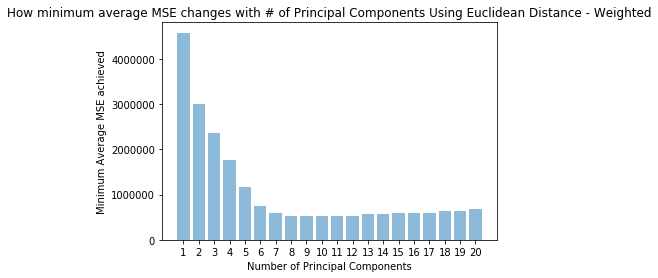

In [34]:
pca_values = []
average_mses = []

for key in average_mses_pca_euclidean_weighted:
    pca_values.append(key)
    average_mses.append(average_mses_pca_euclidean_weighted[key][0])

fig8, ax8 = plt.subplots()

ax8.bar(pca_values, average_mses, align='center', alpha=0.5)
ax8.set_title("How minimum average MSE changes with # of Principal Components Using Euclidean Distance - Weighted")
ax8.set_xticks(pca_values)
ax8.set_xlabel('Number of Principal Components')
ax8.set_ylabel('Minimum Average MSE achieved')
plt.show()

In [37]:
min_mse_pca_euclidean_weighted = min(average_mses)
min_mse_eulcidean_weighted_pca_value = min(average_mses_pca_euclidean_weighted, key=average_mses_pca_euclidean_weighted.get)
min_k_pca_euclidean_weighted = average_mses_pca_euclidean_weighted[min_mse_eulcidean_weighted_pca_value][1]

print("The minimum average MSE when using the Eucldiean distance and weighted variation is equal to " 
      + str(min_mse_pca_euclidean_weighted) + ", achieved when the number of principal components = " 
      + str(min_mse_eulcidean_weighted_pca_value) + ", and when k = " + str(min_k_pca_euclidean_weighted))

The minimum average MSE when using the Eucldiean distance and weighted variation is equal to 514848.51800000307, achieved when the number of principal components = 8, and when k = 5


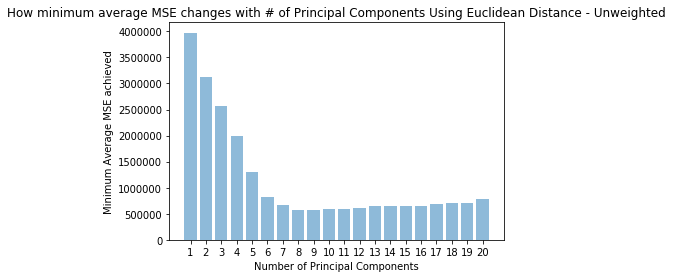

In [68]:
pca_values = []
average_mses = []

for key in average_mses_pca_euclidean:
    pca_values.append(key)
    average_mses.append(average_mses_pca_euclidean[key][0])

fig9, ax9 = plt.subplots()    

ax9.bar(pca_values, average_mses, align='center', alpha=0.5)
ax9.set_title("How minimum average MSE changes with # of Principal Components Using Euclidean Distance - Unweighted")
ax9.set_xticks(pca_values)
ax9.set_xlabel('Number of Principal Components')
ax9.set_ylabel('Minimum Average MSE achieved')
plt.show()

In [69]:
min_mse_pca_euclidean = min(average_mses)
min_mse_euclidean_pca_value = min(average_mses_pca_euclidean, key=average_mses_pca_euclidean.get)
min_k_pca_euclidean = average_mses_pca_euclidean[min_mse_euclidean_pca_value][1]


print("The minimum average MSE when using the Eucldiean distance and unweighted variation is equal to " 
      + str(min_mse_pca_euclidean) + ", achieved when the number of principal components = " 
      + str(min_mse_euclidean_pca_value) + ", and when k = " + str(min_k_pca_euclidean))

The minimum average MSE when using the Eucldiean distance and unweighted variation is equal to 571305.6000092695, achieved when the number of principal components = 8, and when k = 4


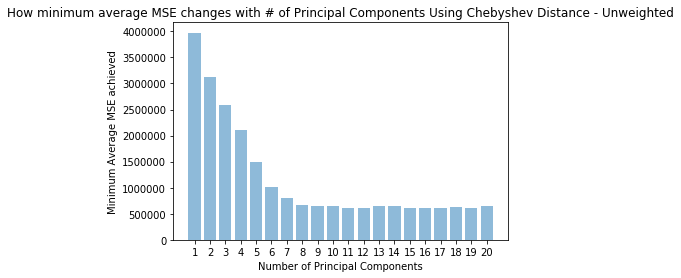

In [70]:
pca_values = []
average_mses = []

for key in average_mses_pca_chebyshev:
    pca_values.append(key)
    average_mses.append(average_mses_pca_chebyshev[key][0])

fig10, ax10 = plt.subplots()    

ax10.bar(pca_values, average_mses, align='center', alpha=0.5)
ax10.set_title("How minimum average MSE changes with # of Principal Components Using Chebyshev Distance - Unweighted")
ax10.set_xticks(pca_values)
ax10.set_xlabel('Number of Principal Components')
ax10.set_ylabel('Minimum Average MSE achieved')
plt.show()

In [71]:
min_mse_pca_chebyshev = min(average_mses)
min_mse_chebyshev_pca_value = min(average_mses_pca_chebyshev, key=average_mses_pca_chebyshev.get)
min_k_pca_chebyshev = average_mses_pca_chebyshev[min_mse_chebyshev_pca_value][1]


print("The minimum average MSE when using the Chebyshev distance and unweighted variation is equal to " 
      + str(min_mse_pca_chebyshev) + ", achieved when the number of principal components = " 
      + str(min_mse_chebyshev_pca_value) + ", and when k = " + str(min_k_pca_chebyshev))

The minimum average MSE when using the Chebyshev distance and unweighted variation is equal to 608727.5930704898, achieved when the number of principal components = 17, and when k = 3


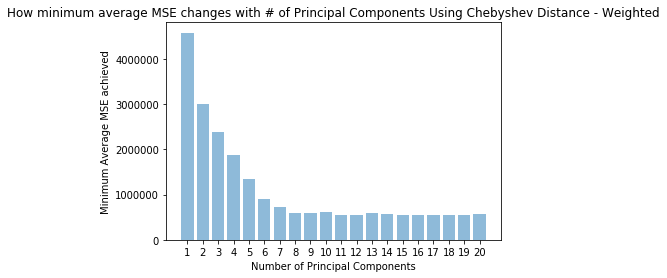

In [72]:
pca_values = []
average_mses = []

for key in average_mses_pca_chebyshev_weighted:
    pca_values.append(key)
    average_mses.append(average_mses_pca_chebyshev_weighted[key][0])

fig11, ax11 = plt.subplots()    

ax11.bar(pca_values, average_mses, align='center', alpha=0.5)
ax11.set_title("How minimum average MSE changes with # of Principal Components Using Chebyshev Distance - Weighted")
ax11.set_xticks(pca_values)
ax11.set_xlabel('Number of Principal Components')
ax11.set_ylabel('Minimum Average MSE achieved')
plt.show()

In [73]:
min_mse_pca_chebyshev_weighted = min(average_mses)
min_mse_chebyshev_weighted_pca_value = min(average_mses_pca_chebyshev_weighted, key=average_mses_pca_chebyshev_weighted.get)
min_k_pca_chebyshev_weighted = average_mses_pca_chebyshev_weighted[min_mse_chebyshev_weighted_pca_value][1]


print("The minimum average MSE when using the Chebyshev distance and weighted variation is equal to " 
      + str(min_mse_pca_chebyshev_weighted) + ", achieved when the number of principal components = " 
      + str(min_mse_chebyshev_weighted_pca_value) + ", and when k = " + str(min_k_pca_chebyshev_weighted))

The minimum average MSE when using the Chebyshev distance and weighted variation is equal to 536910.6625182477, achieved when the number of principal components = 17, and when k = 6


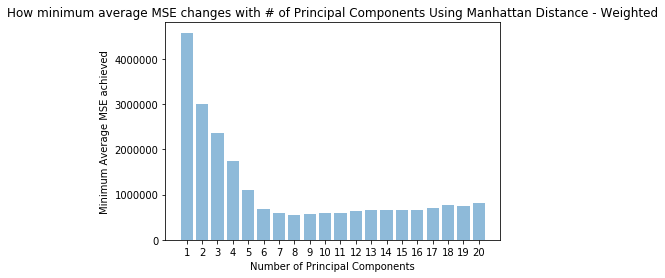

In [74]:
pca_values = []
average_mses = []

for key in average_mses_pca_manhattan_weighted:
    pca_values.append(key)
    average_mses.append(average_mses_pca_manhattan_weighted[key][0])

fig12, ax12 = plt.subplots()    

ax12.bar(pca_values, average_mses, align='center', alpha=0.5)
ax12.set_title("How minimum average MSE changes with # of Principal Components Using Manhattan Distance - Weighted")
ax12.set_xticks(pca_values)
ax12.set_xlabel('Number of Principal Components')
ax12.set_ylabel('Minimum Average MSE achieved')
plt.show()

In [75]:
min_mse_pca_manhattan_weighted = min(average_mses)
min_mse_manhattan_weighted_pca_value = min(average_mses_pca_manhattan_weighted, key=average_mses_pca_manhattan_weighted.get)
min_k_pca_manhattan_weighted = average_mses_pca_manhattan_weighted[min_mse_manhattan_weighted_pca_value][1]

print("The minimum average MSE when using the Manhattan distance and weighted variation is equal to " 
      + str(min_mse_pca_manhattan_weighted) + ", achieved when the number of principal components = " 
      + str(min_mse_manhattan_weighted_pca_value) + ", and when k = " + str(min_k_pca_manhattan_weighted))

The minimum average MSE when using the Manhattan distance and weighted variation is equal to 546334.0649937572, achieved when the number of principal components = 8, and when k = 4


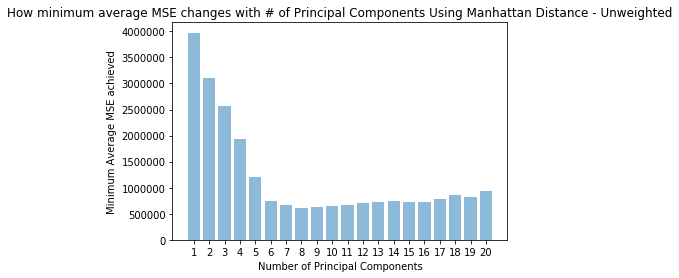

In [76]:
pca_values = []
average_mses = []

for key in average_mses_pca_manhattan:
    pca_values.append(key)
    average_mses.append(average_mses_pca_manhattan[key][0])

fig13, ax13 = plt.subplots()    

ax13.bar(pca_values, average_mses, align='center', alpha=0.5)
ax13.set_title("How minimum average MSE changes with # of Principal Components Using Manhattan Distance - Unweighted")
ax13.set_xticks(pca_values)
ax13.set_xlabel('Number of Principal Components')
ax13.set_ylabel('Minimum Average MSE achieved')
plt.show()

In [77]:
min_mse_pca_manhattan = min(average_mses)
min_mse_manhattan_pca_value = min(average_mses_pca_manhattan, key=average_mses_pca_manhattan.get)
min_k_pca_manhattan = average_mses_pca_manhattan[min_mse_manhattan_pca_value][1]


print("The minimum average MSE when using the Manhattan distance and unweighted variation is equal to " 
      + str(min_mse_pca_manhattan) + ", achieved when the number of principal components = " 
      + str(min_mse_manhattan_pca_value) + ", and when k = " + str(min_k_pca_manhattan))

The minimum average MSE when using the Manhattan distance and unweighted variation is equal to 613384.0428439006, achieved when the number of principal components = 8, and when k = 4


All of these graphs look very similar. This highlights that there is not much of a difference the results of different kNN variations using different distance formulas or if it's weighted/unweighted.

This is shown in the following graph:

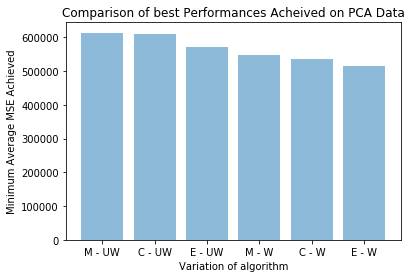

In [78]:
all_min_mse = [min_mse_pca_manhattan, min_mse_pca_chebyshev, min_mse_pca_euclidean, 
               min_mse_pca_manhattan_weighted, min_mse_pca_chebyshev_weighted, min_mse_pca_euclidean_weighted]

for key in average_mses_pca_manhattan:
    pca_values.append(key)
    average_mses.append(average_mses_pca_manhattan[key])

fig13, ax13 = plt.subplots()    
variations = [0, 'M - UW', 'C - UW', 'E - UW', 'M - W', 'C - W', 'E - W']
ax13.bar(y_pos, all_min_mse, align='center', alpha=0.5)
ax13.set_title("Comparison of best Performances Acheived on PCA Data")
ax13.set_xticklabels(variations)
ax13.set_xlabel('Variation of algorithm')
ax13.set_ylabel('Minimum Average MSE Achieved')
plt.show()

Regardless, transforming the data into principal components did not result in a lower MSE than what was achieved using a weighted implementation of kNN on the original data, with Manhattan distance formula and k = 4.

## Sources

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4978658/

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

http://www.data-machine.com/nmtutorial/distanceweightedknnalgorithm.htm